## Imports for the program (Original program by Josh Lozjim and edited by Hayden Fuss, this version by Jeremy McKenzie)

In [21]:
%matplotlib inline
import matplotlib
import time
import csv
import numpy as np
import matplotlib.pyplot as plt
import math
import sys

time_fmt declares the format for the time data
year_data declares an empty hash, and the for loop creates further hashes (think: vectors) assigned to the keys of '2012' and '2013'

In [22]:
time_fmt = "%m/%d/%Y"

years = ('2012', '2013')

year_data = {}
filename = raw_input("Enter the file name to read data from: ")
#filename = sys.stdin.readline()
print filename
outputfile = raw_input("Enter prefix: ")
#outputfile = sys.stdin.readline()
print outputfile
filename = filename.rstrip("\n")
outputfile = outputfile.rstrip("\n")

Enter the file name to read data from: 311_public_2012_2013.csv
311_public_2012_2013.csv
Enter prefix: pub
pub


This portion of the program builds the data list, organized by month, in a list called threeOne. It runs through the list, pulling dates from the csv file, and then counts the number of times any particular month (and thereby the amount of calls in that month) comes up. If a month has not previously been encountered, it is added to the list and given a count of one. Otherwise, it's incremented by one.

In [23]:

with open(filename) as csvfile:
    threeOne = csv.DictReader(csvfile)
        # for all the 311 calls the reader finds
    types = {}
    for e in threeOne:
        date = time.strptime(e['OPEN_DT'], time_fmt) # converts string version of date into a date object
        y = date.tm_year
        d = date.tm_mday
        if not y in types.keys():
            types[y] = {}
        if y == 2012:
            d -= 1
        if date.tm_mon == 4 and d in range (12,23):
            if not d in types[y].keys():
                types[y][d] = {}
            if not e['TYPE'] in types[y][d].keys():
                types[y][d][e['TYPE']] = 1
            else:
                types[y][d][e['TYPE']] += 1


This section builds and displays the chart.

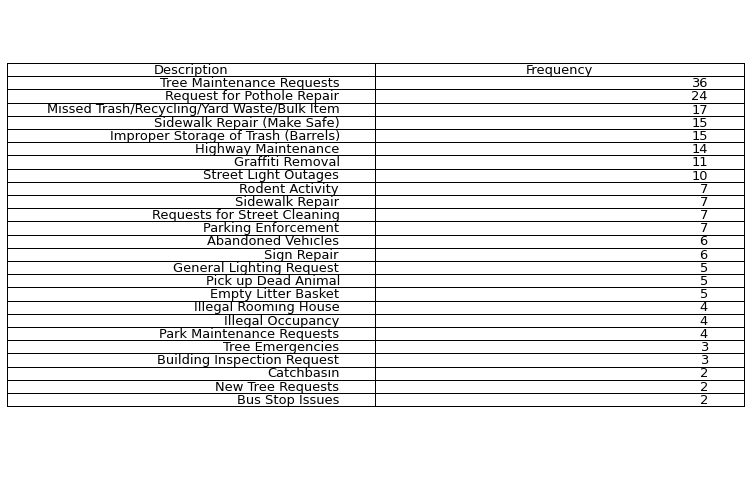

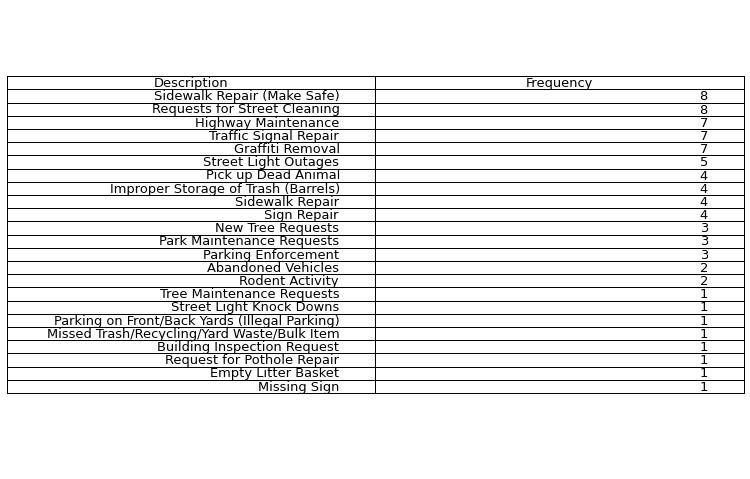

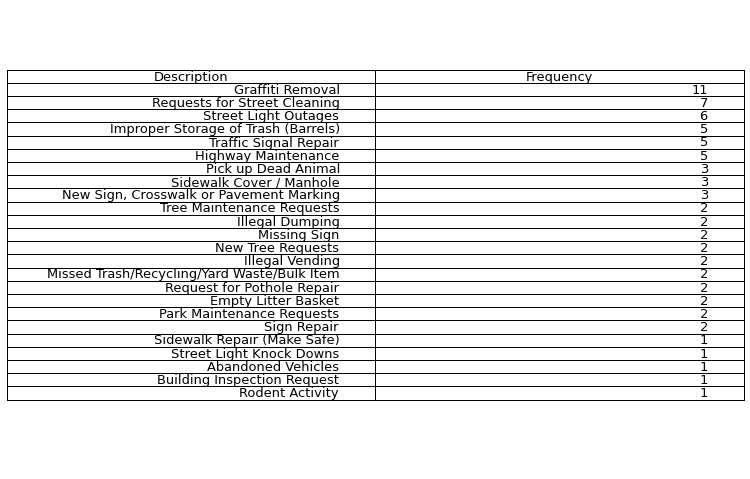

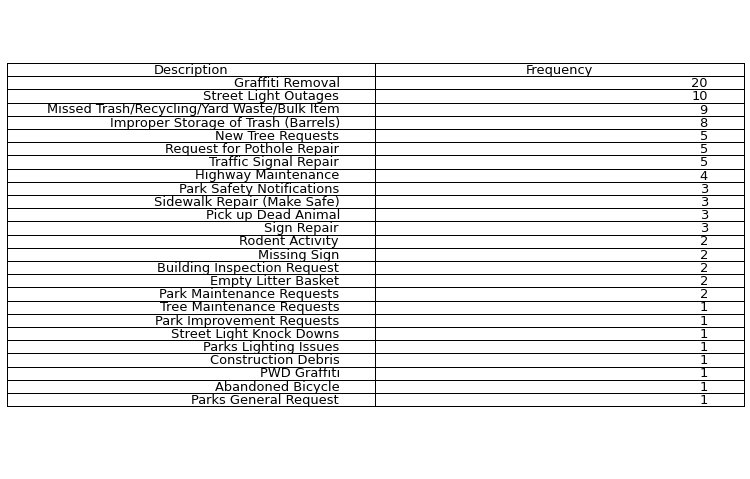

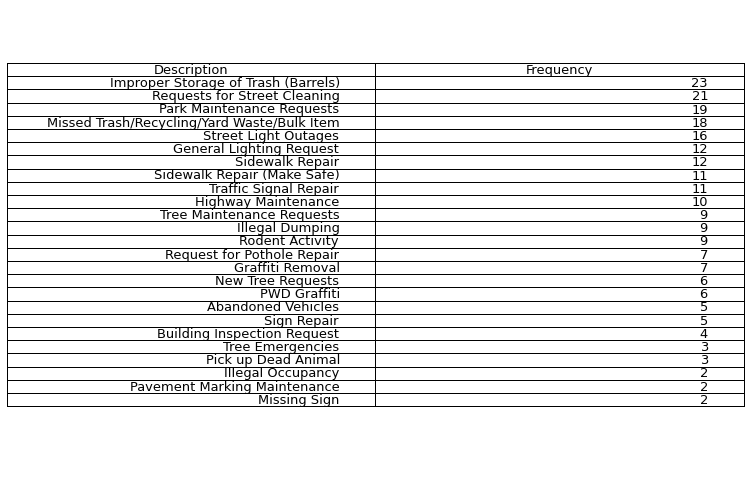

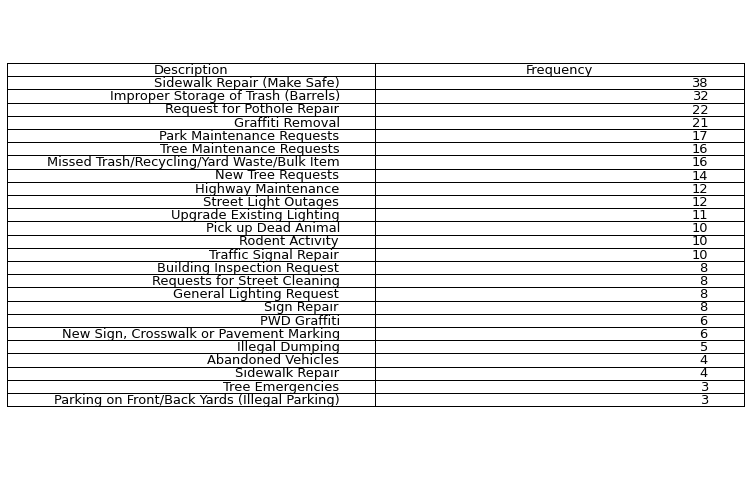

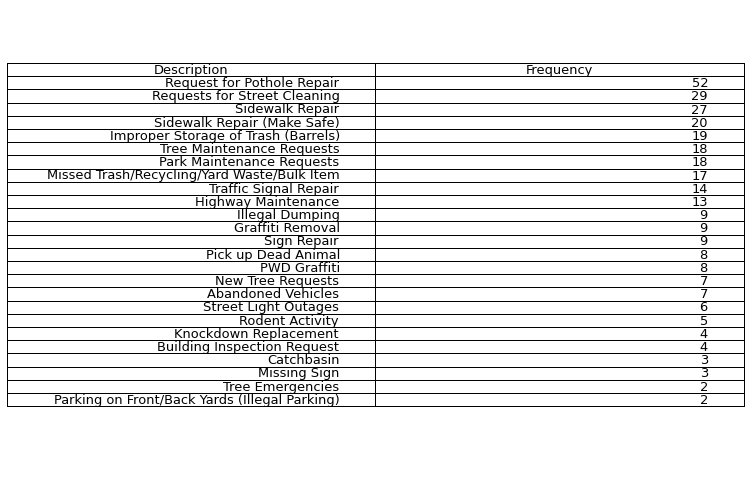

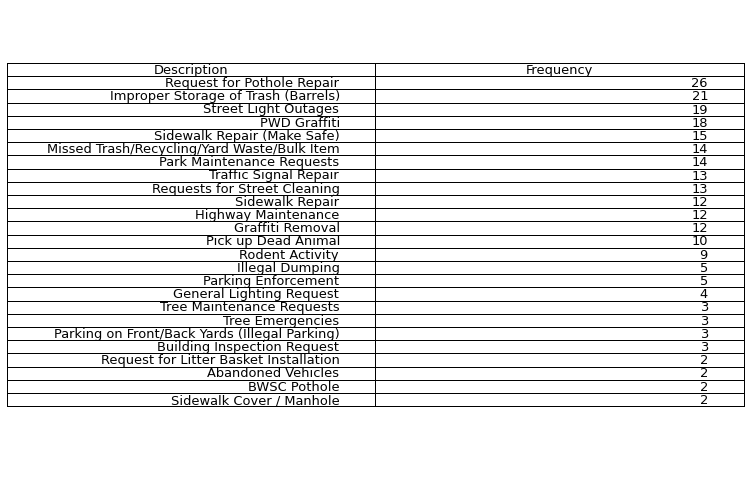

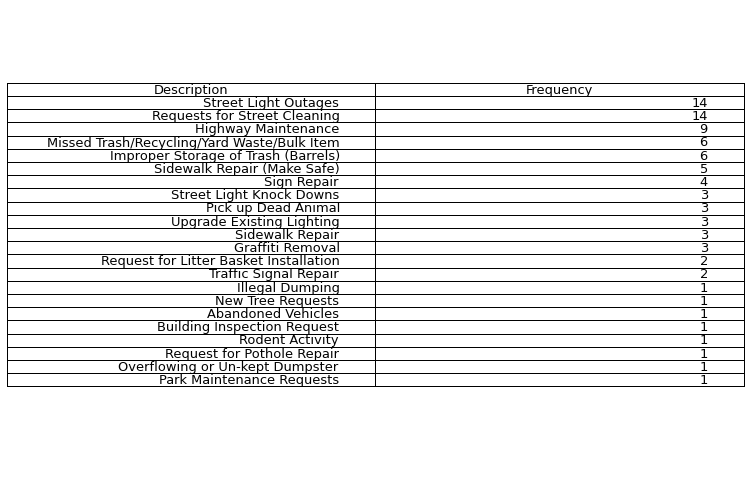

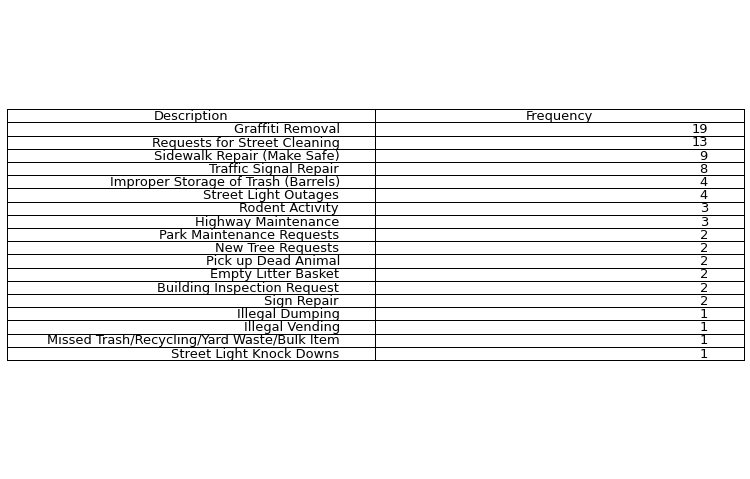

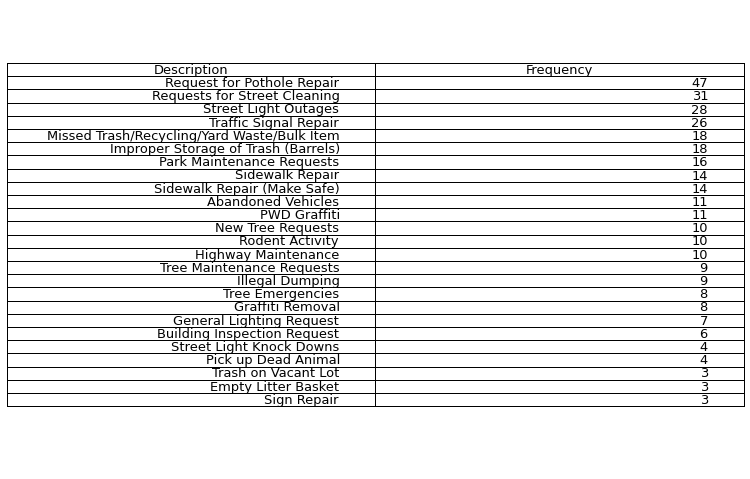

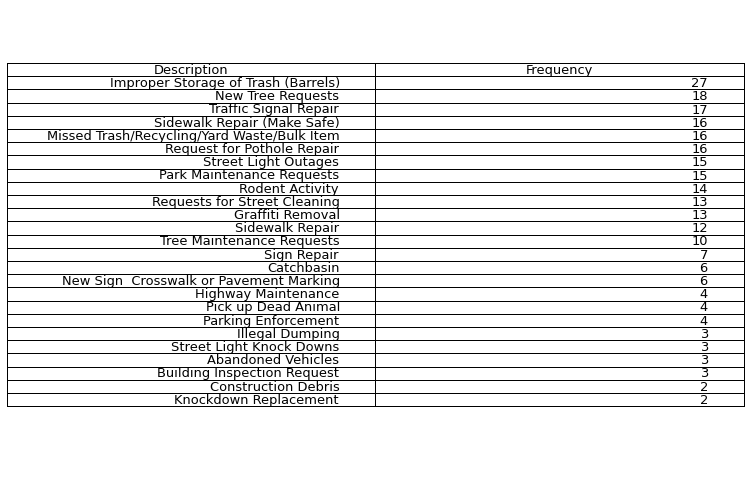

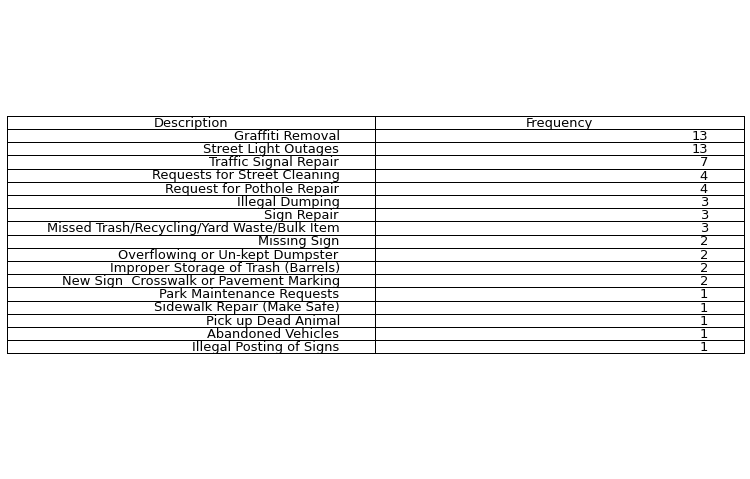

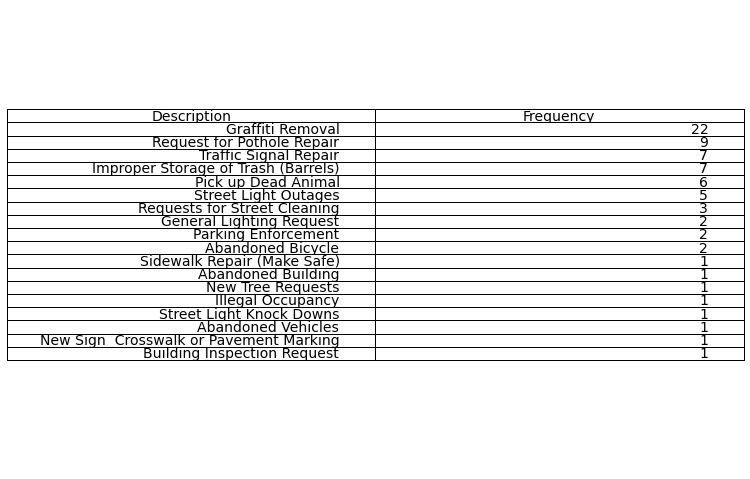

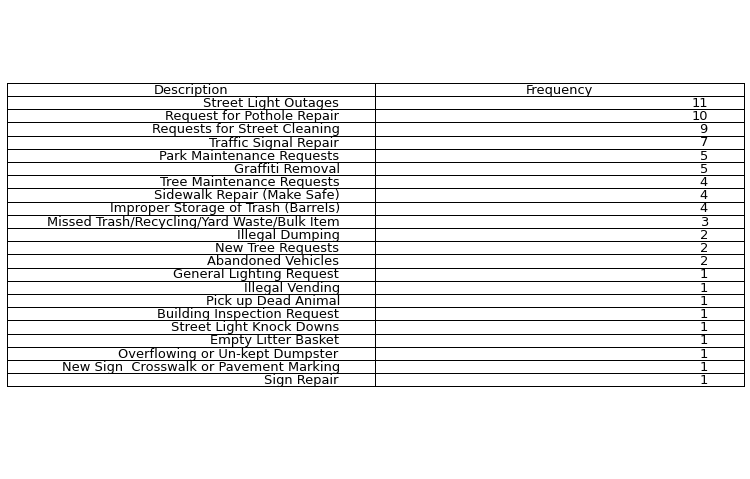

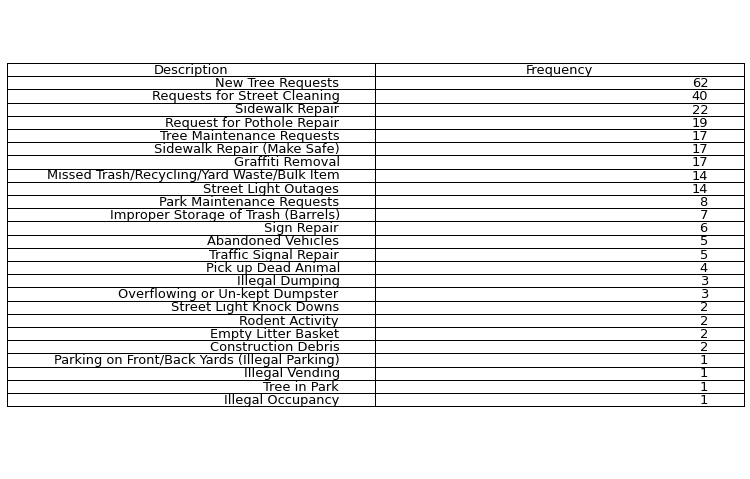

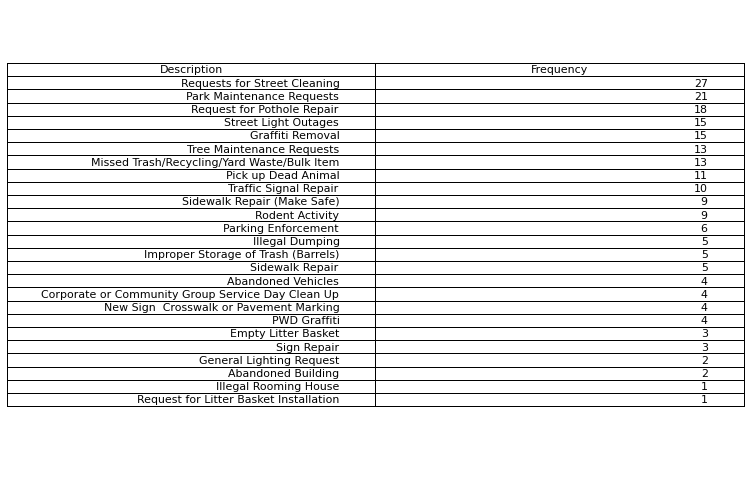

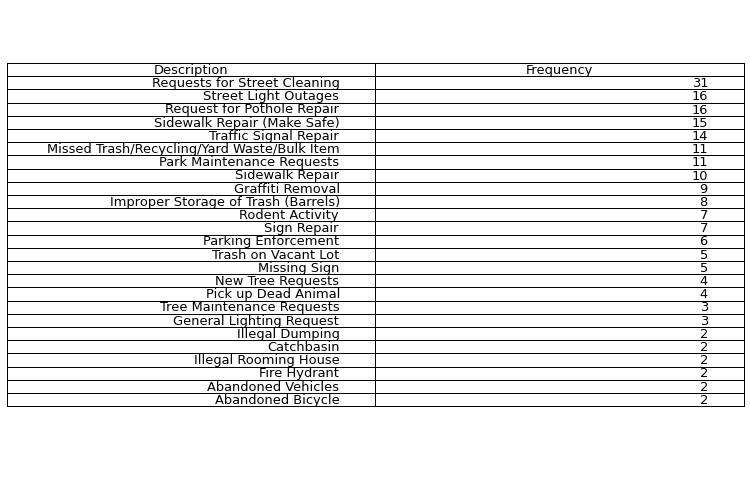

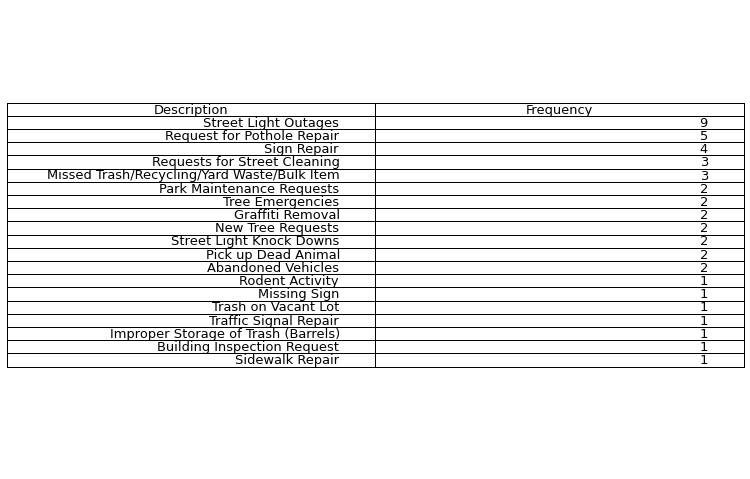

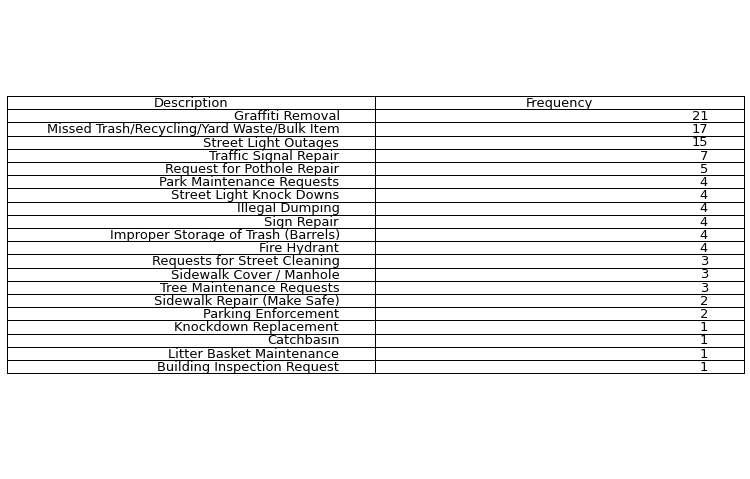

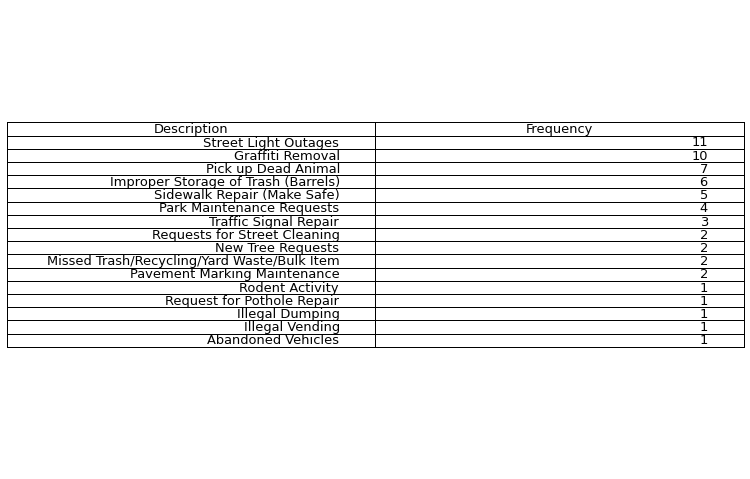

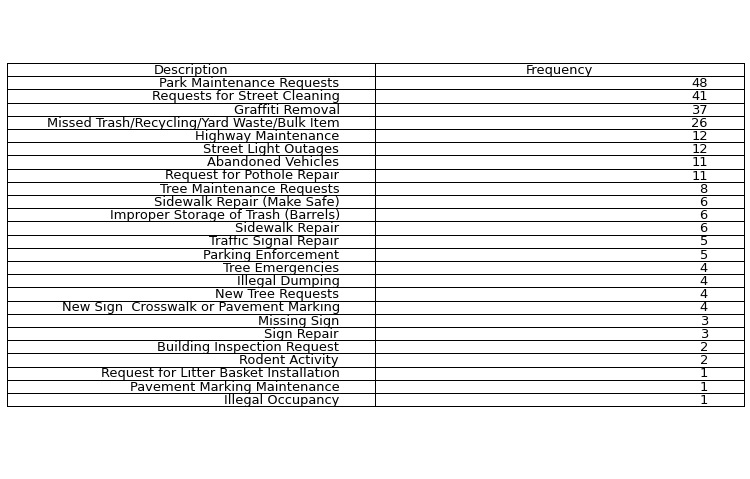

In [24]:
for y in types.keys():
    for d in types[y].keys():
        table_data = []

        colLab = ['Description', 'Frequency']

        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111)
        ax.axis("off")

        # ax.set_title("Top 25 Descriptions for unlatented categories", fontsize=10)

        for t in sorted(types[y][d], key=types[y][d].get, reverse=True)[0:25]:
            table_data.append([t, types[y][d][t]])

        table = ax.table(loc='center', colLabels=colLab, cellText=table_data)
        table.set_fontsize(16)
        table.scale(1.1,1.1)

        plt.savefig("311_" + outputfile + "_types_table_4-" + str(d) + "-" + str(y) + ".png", dpi=96)

